In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('Iris.csv')

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df = df.iloc[:,1:]
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Species'] = encoder.fit_transform(df['Species'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
df = df[df['Species'] != 0][['SepalWidthCm','PetalLengthCm','Species']]


In [7]:
df.head()

,SepalWidthCm,PetalLengthCm,Species
50,3.2,4.7,1
51,3.2,4.5,1
52,3.1,4.9,1
53,2.3,4.0,1
54,2.8,4.6,1


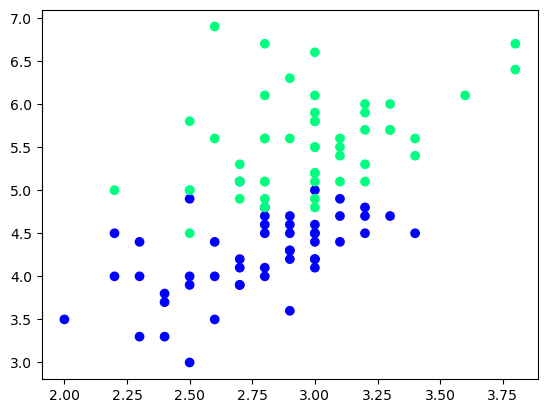

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.scatter(df['SepalWidthCm'],df['PetalLengthCm'],c=df['Species'],cmap='winter')

In [9]:
df_train = df.iloc[:60,:].sample(10)
df_train

,SepalWidthCm,PetalLengthCm,Species
83,2.7,5.1,1
86,3.1,4.7,1
69,2.5,3.9,1
64,2.9,3.6,1
78,2.9,4.5,1
98,2.5,3.0,1
96,2.9,4.2,1
93,2.3,3.3,1
89,2.5,4.0,1
80,2.4,3.8,1


In [10]:
# Taking only 10 rows for training
df = df.sample(100)
df_train = df.iloc[:60,:].sample(10)
df_val = df.iloc[60:80,:].sample(5)
df_test = df.iloc[80:,:].sample(5)
df_train

,SepalWidthCm,PetalLengthCm,Species
89,2.5,4.0,1
104,3.0,5.8,2
107,2.9,6.3,2
69,2.5,3.9,1
85,3.4,4.5,1
59,2.7,3.9,1
87,2.3,4.4,1
106,2.5,4.5,2
147,3.0,5.2,2
93,2.3,3.3,1


In [11]:
df_val

,SepalWidthCm,PetalLengthCm,Species
80,2.4,3.8,1
54,2.8,4.6,1
117,3.8,6.7,2
64,2.9,3.6,1
81,2.4,3.7,1


In [12]:
df_test

,SepalWidthCm,PetalLengthCm,Species
122,2.8,6.7,2
145,3.0,5.2,2
120,3.2,5.7,2
115,3.2,5.3,2
131,3.8,6.4,2


In [13]:
X_test = df_val.iloc[:,0:2].values
y_test = df_val.iloc[:,-1].values
y_test

array([1, 1, 2, 1, 1])

# Case 1 - Bagging

In [22]:
# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

df_bag

,SepalWidthCm,PetalLengthCm,Species
104,3.0,5.8,2
93,2.3,3.3,1
106,2.5,4.5,2
93,2.3,3.3,1
59,2.7,3.9,1
85,3.4,4.5,1
93,2.3,3.3,1
147,3.0,5.2,2


In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score
dt_bag1 = DecisionTreeClassifier()

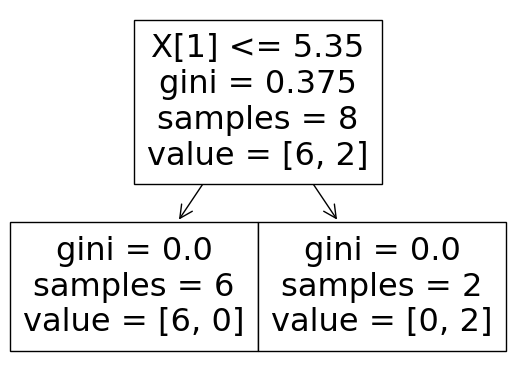

C:\Users\surya\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\surya\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


1.0


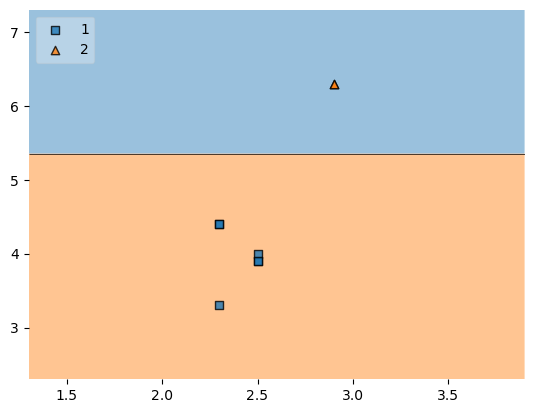

In [33]:
evaluate(dt_bag1,X,y)

In [25]:
# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

,SepalWidthCm,PetalLengthCm,Species
89,2.5,4.0,1
147,3.0,5.2,2
93,2.3,3.3,1
59,2.7,3.9,1
59,2.7,3.9,1
87,2.3,4.4,1
93,2.3,3.3,1
107,2.9,6.3,2


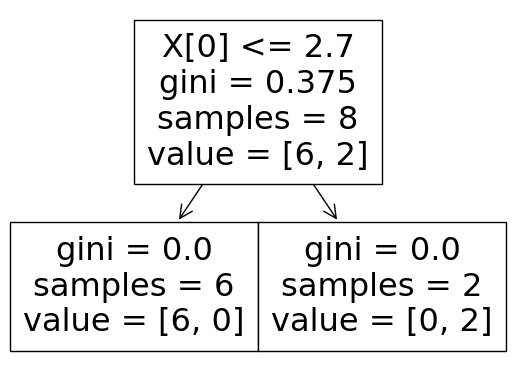

C:\Users\surya\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\surya\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.6


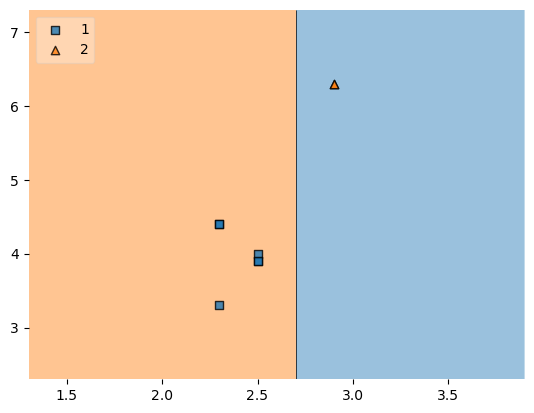

In [32]:
dt_bag2 = DecisionTreeClassifier()
evaluate(dt_bag2,X,y)

In [28]:
# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

,SepalWidthCm,PetalLengthCm,Species
69,2.5,3.9,1
93,2.3,3.3,1
107,2.9,6.3,2
107,2.9,6.3,2
87,2.3,4.4,1
87,2.3,4.4,1
89,2.5,4.0,1
69,2.5,3.9,1


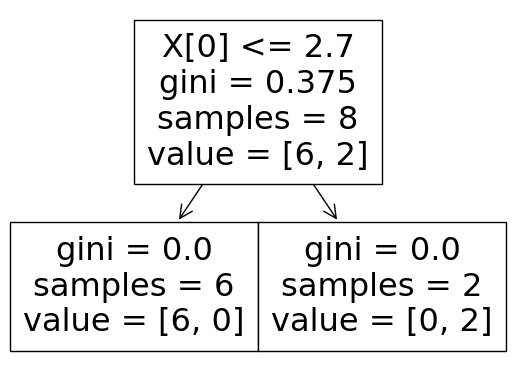

C:\Users\surya\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\surya\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.6


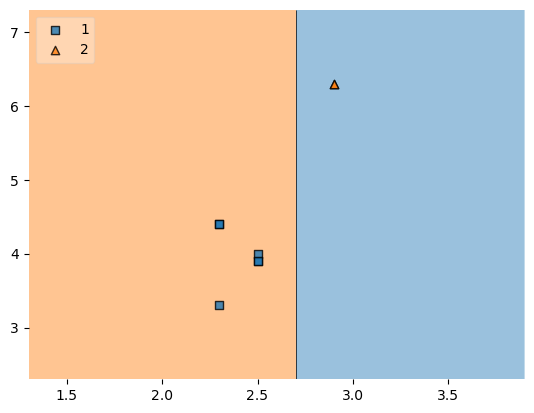

In [31]:
dt_bag3 = DecisionTreeClassifier()
evaluate(dt_bag3,X,y)

In [30]:
def evaluate(clf,X,y):
    clf.fit(X,y)
    plot_tree(clf)
    plt.show()
    plot_decision_regions(X.values, y.values, clf=clf, legend=2)
    y_pred = clf.predict(X_test)
    print(accuracy_score(y_test,y_pred))

# Predict

In [34]:
df_test

,SepalWidthCm,PetalLengthCm,Species
122,2.8,6.7,2
145,3.0,5.2,2
120,3.2,5.7,2
115,3.2,5.3,2
131,3.8,6.4,2


In [35]:
print("Predictor 1",dt_bag1.predict(np.array([2.2,5.0]).reshape(1,2)))
print("Predictor 2",dt_bag2.predict(np.array([2.2,5.0]).reshape(1,2)))
print("Predictor 3",dt_bag3.predict(np.array([2.2,5.0]).reshape(1,2)))

Predictor 1 [1]
Predictor 2 [1]
Predictor 3 [1]


C:\Users\surya\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\surya\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\surya\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


# Pasting

In [36]:
# Row sampling without replacement
df_train

,SepalWidthCm,PetalLengthCm,Species
89,2.5,4.0,1
104,3.0,5.8,2
107,2.9,6.3,2
69,2.5,3.9,1
85,3.4,4.5,1
59,2.7,3.9,1
87,2.3,4.4,1
106,2.5,4.5,2
147,3.0,5.2,2
93,2.3,3.3,1


In [37]:
df_train.sample(8)

,SepalWidthCm,PetalLengthCm,Species
93,2.3,3.3,1
85,3.4,4.5,1
69,2.5,3.9,1
87,2.3,4.4,1
89,2.5,4.0,1
107,2.9,6.3,2
59,2.7,3.9,1
104,3.0,5.8,2


# Random Subspaces

In [40]:
df1 = pd.read_csv('Iris.csv')
df1 = df1.sample(10)
df1

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
123,124,6.3,2.7,4.9,1.8,Iris-virginica
85,86,6.0,3.4,4.5,1.6,Iris-versicolor
74,75,6.4,2.9,4.3,1.3,Iris-versicolor
103,104,6.3,2.9,5.6,1.8,Iris-virginica
47,48,4.6,3.2,1.4,0.2,Iris-setosa
12,13,4.8,3.0,1.4,0.1,Iris-setosa
139,140,6.9,3.1,5.4,2.1,Iris-virginica
133,134,6.3,2.8,5.1,1.5,Iris-virginica
77,78,6.7,3.0,5.0,1.7,Iris-versicolor
99,100,5.7,2.8,4.1,1.3,Iris-versicolor


In [41]:
df1.sample(2,replace=True,axis=1)

,Species,SepalLengthCm
123,Iris-virginica,6.3
85,Iris-versicolor,6.0
74,Iris-versicolor,6.4
103,Iris-virginica,6.3
47,Iris-setosa,4.6
12,Iris-setosa,4.8
139,Iris-virginica,6.9
133,Iris-virginica,6.3
77,Iris-versicolor,6.7
99,Iris-versicolor,5.7


# Random Patches

In [42]:
df1

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
123,124,6.3,2.7,4.9,1.8,Iris-virginica
85,86,6.0,3.4,4.5,1.6,Iris-versicolor
74,75,6.4,2.9,4.3,1.3,Iris-versicolor
103,104,6.3,2.9,5.6,1.8,Iris-virginica
47,48,4.6,3.2,1.4,0.2,Iris-setosa
12,13,4.8,3.0,1.4,0.1,Iris-setosa
139,140,6.9,3.1,5.4,2.1,Iris-virginica
133,134,6.3,2.8,5.1,1.5,Iris-virginica
77,78,6.7,3.0,5.0,1.7,Iris-versicolor
99,100,5.7,2.8,4.1,1.3,Iris-versicolor


In [43]:
df1.sample(8,replace=True).sample(2,replace=True,axis=1)

,SepalLengthCm,Species
133,6.3,Iris-virginica
103,6.3,Iris-virginica
85,6.0,Iris-versicolor
47,4.6,Iris-setosa
12,4.8,Iris-setosa
12,4.8,Iris-setosa
85,6.0,Iris-versicolor
47,4.6,Iris-setosa
